In [4]:
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F 
import torchvision.transforms as T
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from process.model import CustomNeuralNetwork   #internal  #internal
from process.load import collect_image_files
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np

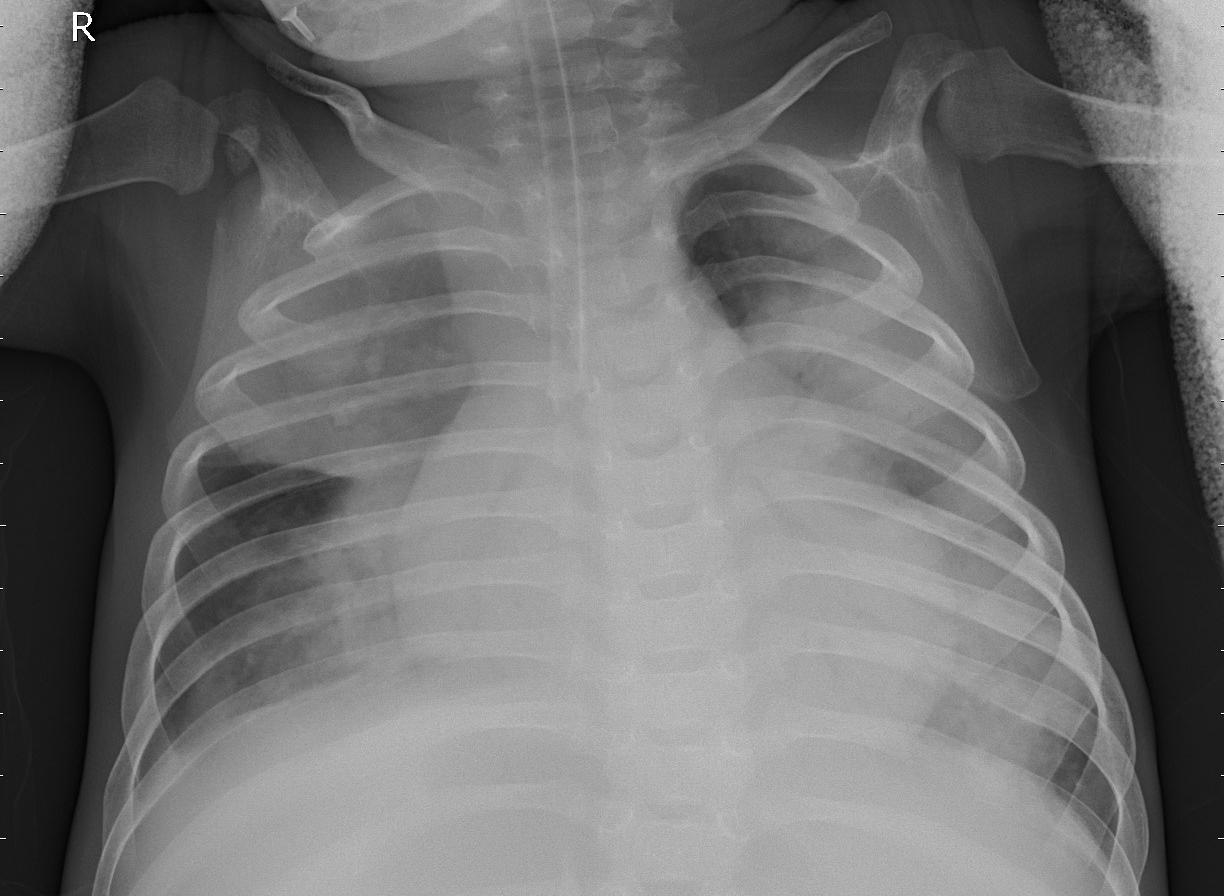

In [154]:
from PIL import Image

test = Image.open('data2/test/PNEUMONIA/person7_bacteria_24.jpeg')
test

In [ ]:
from process.data_module import base

In [159]:
pre = read_image('data2/test/PNEUMONIA/person7_bacteria_24.jpeg')
post = color_transforms(pre)
to_pil = T.ToPILImage()
test = to_pil(post)
test.show()


In [153]:
import cv2

def sobel(image):

    # convert to cv2 image object
    image_np = image.numpy()
    cv2_image = np.transpose(image_np, (1, 2, 0))

    cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

    # sobel transformation
    image = cv2.Sobel(src=cv2_image, 
                      ddepth=cv2.CV_16S,
                      dst=cv2.CV_64F,
                      dx=1, 
                      dy=1,
                      ksize=3)
    

    transforms = T.ToTensor()
    image = transforms(image)

    to_gray = T.Grayscale(num_output_channels=1)
    image = to_gray(image)
    return image


base_transforms = T.Compose(
    [
    # centercrop to consistent aspect ratio - relative height/width ratio
    # crop is randomizing by default
    T.CenterCrop(size=(512,924)),

    # resize - about the amount of pixels
    T.Resize((256,256)),

    # Some images read in with three channels
    T.Grayscale(num_output_channels=1)

    ])

            
edges_transforms = T.Compose(
    [
    #base
    T.CenterCrop(size=(512,924)),
    T.Resize((256,256)),
    T.Grayscale(num_output_channels=1),

    #edges
    T.GaussianBlur((5,5)),
    T.Lambda(sobel)
    ])


def normalize(image):
    
    transforms = T.Normalize(mean=0, std=255)
    image = transforms(image.float())

    #image = image.numpy()

    # transforms = T.ToTensor()
    # image = transforms(image)
    transforms = T.Grayscale(num_output_channels=1)
    image = transforms(image)

    return image


color_transforms = T.Compose(
    [
    #base
    T.CenterCrop(size=(512,924)),
    T.Resize((256,256)),
    T.Grayscale(num_output_channels=1),


    #color
    #T.ToTensor(), #rescale
    normalize,
    T.ColorJitter(brightness=1.0)
    ])

both_transforms = T.Compose(
    [
    #base
    T.CenterCrop(size=(512,924)),
    T.Resize((256,256)),
    T.Grayscale(num_output_channels=1),

    #edges
    T.GaussianBlur((5,5)),
    T.Lambda(sobel),
    
    #color
    T.ToTensor(), #rescale
    T.Normalize(mean=0, std=255),
    T.ColorJitter()

    ])

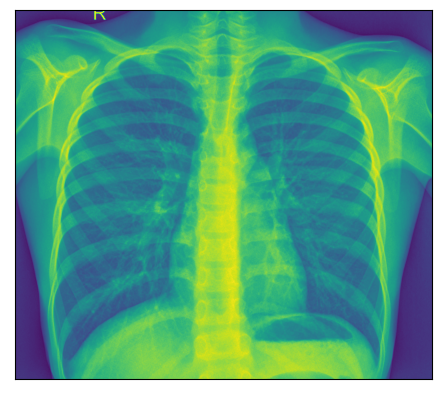

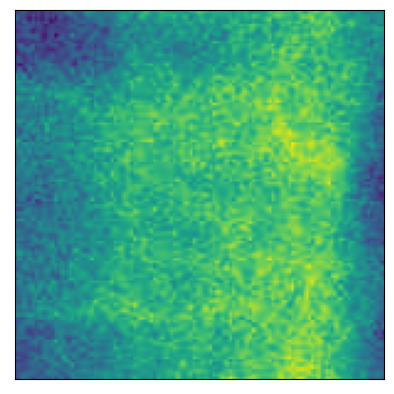

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


show(pre)
show(post)
